#Emotion Recognition from Speech Samples.


---




#Importing Libraries


In [ ]:
## Python
import os
import random
import sys
import warnings
warnings.filterwarnings('ignore')


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf

py.init_notebook_mode(connected=True)


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
#from keras.utils import to_categorical

from keras.models import Model, Sequential
from keras import optimizers
from keras.layers import Input, Conv1D, Conv2D,BatchNormalization, MaxPooling1D,MaxPooling2D, LSTM, Dense, Activation, Layer,Reshape

#from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [ ]:
pip install catboost

     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Dataset

Ravdess : https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio <br>
Savee : https://www.kaggle.com/barelydedicated/savee-database <br>
TESS : https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess

###**Ravdess**

In [ ]:
Ravdess='/content/drive/MyDrive/SER DATASET/Ravdess/audio_speech_actors_01-24'

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list: 
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess +'/'+ dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess +'/'+ dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df

,Emotions,Path
0,happy,/content/drive/MyDrive/SER DATASET/Ravdess/aud...
1,sad,/content/drive/MyDrive/SER DATASET/Ravdess/aud...
2,fear,/content/drive/MyDrive/SER DATASET/Ravdess/aud...
3,sad,/content/drive/MyDrive/SER DATASET/Ravdess/aud...
4,happy,/content/drive/MyDrive/SER DATASET/Ravdess/aud...
...,...,...
1435,surprise,/content/drive/MyDrive/SER DATASET/Ravdess/aud...
1436,disgust,/content/drive/MyDrive/SER DATASET/Ravdess/aud...
1437,sad,/content/drive/MyDrive/SER DATASET/Ravdess/aud...
1438,disgust,/content/drive/MyDrive/SER DATASET/Ravdess/aud...


###**SAVEE**

In [ ]:
file_emotion = []
file_path = []

In [ ]:
Savee = "/content/drive/MyDrive/SER DATASET/Savee/"
Savee_sub = ["KL/","DC/","JE/","JK/"]
#

In [ ]:
for subfolder in Savee_sub:
    
    Savee_path = os.path.join(Savee, subfolder)
    #print(Savee_path)
    savee_directory_list = os.listdir(Savee_path)
    for file in savee_directory_list:
        #print(file)
        file_path.append(Savee_path + file)
        #print(Savee_path + file)
        part = file
        ele = part[:-6]
        if ele=='a':
              file_emotion.append('angry')
        elif ele=='d':
              file_emotion.append('disgust')
        elif ele=='f':
              file_emotion.append('fear')
        elif ele=='h':
              file_emotion.append('happy')
        elif ele=='n':
              file_emotion.append('neutral')
        elif ele=='sa':
              file_emotion.append('sad')
        else:
              file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df

,Emotions,Path
0,happy,/content/drive/MyDrive/SER DATASET/Savee/KL/h0...
1,disgust,/content/drive/MyDrive/SER DATASET/Savee/KL/d0...
2,fear,/content/drive/MyDrive/SER DATASET/Savee/KL/f1...
3,disgust,/content/drive/MyDrive/SER DATASET/Savee/KL/d0...
4,fear,/content/drive/MyDrive/SER DATASET/Savee/KL/f0...
...,...,...
475,surprise,/content/drive/MyDrive/SER DATASET/Savee/JK/su...
476,surprise,/content/drive/MyDrive/SER DATASET/Savee/JK/su...
477,surprise,/content/drive/MyDrive/SER DATASET/Savee/JK/su...
478,surprise,/content/drive/MyDrive/SER DATASET/Savee/JK/su...


###**TESS**

In [ ]:
Tess = '/content/drive/MyDrive/SER DATASET/TES/'

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df

,Emotions,Path
0,surprise,/content/drive/MyDrive/SER DATASET/TES/YAF_ple...
1,surprise,/content/drive/MyDrive/SER DATASET/TES/YAF_ple...
2,surprise,/content/drive/MyDrive/SER DATASET/TES/YAF_ple...
3,surprise,/content/drive/MyDrive/SER DATASET/TES/YAF_ple...
4,surprise,/content/drive/MyDrive/SER DATASET/TES/YAF_ple...
...,...,...
2813,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...
2814,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...
2815,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...
2816,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...


**Concat all dataset**

In [ ]:
data_path = pd.concat([Savee_df,Ravdess_df,Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path

,Emotions,Path
0,happy,/content/drive/MyDrive/SER DATASET/Savee/KL/h0...
1,disgust,/content/drive/MyDrive/SER DATASET/Savee/KL/d0...
2,fear,/content/drive/MyDrive/SER DATASET/Savee/KL/f1...
3,disgust,/content/drive/MyDrive/SER DATASET/Savee/KL/d0...
4,fear,/content/drive/MyDrive/SER DATASET/Savee/KL/f0...
...,...,...
2813,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...
2814,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...
2815,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...
2816,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...


In [ ]:
data_path = data_path.iloc[2700:,:]
data_path

,Emotions,Path
780,neutral,/content/drive/MyDrive/SER DATASET/TES/YAF_neu...
781,neutral,/content/drive/MyDrive/SER DATASET/TES/YAF_neu...
782,neutral,/content/drive/MyDrive/SER DATASET/TES/YAF_neu...
783,neutral,/content/drive/MyDrive/SER DATASET/TES/YAF_neu...
784,neutral,/content/drive/MyDrive/SER DATASET/TES/YAF_neu...
...,...,...
2813,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...
2814,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...
2815,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...
2816,angry,/content/drive/MyDrive/SER DATASET/TES/OAF_ang...


#FEATURE EXTRACTION
**Note :** We used builtin libraries to extract features<br>
Libraries are : praat-parselmouth, Librosa

In [ ]:
!pip install praat-parselmouth

In [ ]:
#Extracting Spectral Features
def extract_spec_features(path,data,sample_rate):
    attributes = {}
    # ZCR
    zcr = librosa.feature.zero_crossing_rate(y=data)
    attributes['zcr'] = np.mean(zcr)

    # # Chroma_stft
    # stft = np.abs(librosa.stft(data))
    # chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    # attributes['chroma_stft'] = chroma_stft

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13).T, axis=0)
    
    for count,ele in enumerate(mfcc):
      name = 'mfcc ' + str(count)
      attributes[name] = ele

    # Root Mean Square Value
    rms = librosa.feature.rms(y=data)
    attributes['rms'] = np.mean(rms)

    #Spectral Rolloff
    rolloff = librosa.feature.spectral_rolloff(data, sr=sample_rate, roll_percent=0.99)
    attributes['spectral rolloff'] = np.mean(rolloff)

    #Spectral Centroid
    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sample_rate)[0]
    attributes['spectral centroids'] = np.mean(spectral_centroids)

    #LPC
    lpc= librosa.lpc(data, 16)
    for count,ele in enumerate(lpc):
      name = 'lpc ' + str(count)
      attributes[name] = ele

   

    
    return attributes

In [ ]:
import pandas as pd
import parselmouth
from feature_extraction_utils import *

import scipy

In [ ]:
#Extracting Prosodic Features

def extract_pros_features(sound):
  attributes = {}

  #Prosodic Features
  intensity_attributes = get_intensity_attributes(sound)[0]
  pitch_attributes = get_pitch_attributes(sound)[0]
  attributes.update(intensity_attributes)
  attributes.update(pitch_attributes)

  formant_attributes = get_formant_attributes(sound)[0]
  attributes.update(formant_attributes)


  #Voice Quality Features
  attributes['local_jitter'] = get_local_jitter(sound)
  attributes['local_shimmer'] = get_local_shimmer(sound)
  hnr_attributes = get_harmonics_to_noise_ratio_attributes(sound)[0]
  gne_attributes = get_glottal_to_noise_ratio_attributes(sound)[0]
  attributes.update(hnr_attributes)
  attributes.update(gne_attributes)


  # lfcc = get_lfcc(sound,num_coefficients=12)
  # for count,ele in enumerate(lfcc):
  #     name = 'lfcc ' + str(count)
  #     attributes[name] = ele

  

  
  return attributes

In [ ]:
#Combine all features
def get_features(path):
    sound = parselmouth.Sound(path)
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    
    # without augmentation
    res_pros = extract_pros_features(sound)
    res_spec = extract_spec_features(path,data, sample_rate)

    result = res_pros
    result.update(res_spec)
    #print(result)
    
    
    return result

Run from Feature extraction upto here to test a single audio.

In [ ]:
#Convertung features into dataframe
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    X.append(feature)
    print(emotion)
    Y.append(emotion)

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('SER features.csv', index=False)
Features

,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,mean_intensity,stddev_intensity,q1_intensity,median_intensity,q3_intensity,voiced_fraction,min_pitch,relative_min_pitch_time,max_pitch,relative_max_pitch_time,mean_pitch,stddev_pitch,q1_pitch,q3_pitch,mean_absolute_pitch_slope,pitch_slope_without_octave_jumps,f1_mean,f2_mean,f3_mean,f4_mean,f1_median,f2_median,f3_median,f4_median,formant_dispersion,average_formant,mff,fitch_vtl,delta_f,vtl_delta_f,local_jitter,local_shimmer,min_hnr,relative_min_hnr_time,max_hnr,relative_max_hnr_time,...,min_gne,max_gne,mean_gne,stddev_gne,sum_gne,zcr,mfcc 0,mfcc 1,mfcc 2,mfcc 3,mfcc 4,mfcc 5,mfcc 6,mfcc 7,mfcc 8,mfcc 9,mfcc 10,mfcc 11,mfcc 12,rms,spectral rolloff,spectral centroids,lpc 0,lpc 1,lpc 2,lpc 3,lpc 4,lpc 5,lpc 6,lpc 7,lpc 8,lpc 9,lpc 10,lpc 11,lpc 12,lpc 13,lpc 14,lpc 15,lpc 16,labels
0,31.070034,0.665794,71.083700,0.172590,59.428950,11.383366,53.846079,187.343036,68.614574,0.668224,174.945056,0.617503,209.285598,0.119842,187.770932,4.794392,185.186616,189.275468,117.327194,10.777213,499.742654,1887.855486,2681.590944,3959.196953,524.854004,1921.280432,2860.385887,3915.774198,1130.306731,2305.573630,1833.233924,15.317767,1142.882003,15.312167,0.007311,0.037084,-227.219765,0.391712,41.093131,0.382720,...,0.0,0.972287,0.351613,0.449128,914.545424,0.124260,-395.545349,68.908417,-2.987440,36.122231,-0.155438,-6.275394,-3.257171,-13.641854,-5.835948,5.258639,-15.136255,13.856129,-2.959834,0.029705,9351.268454,2351.727902,1.0,-1.660888,1.112013,-0.769302,0.752294,-0.699040,0.683095,-0.781546,0.855573,-0.664822,0.359858,-0.452591,0.602657,-0.441614,0.359138,-0.350654,0.212862,neutral
1,30.586394,0.618829,71.623869,0.184681,61.000608,10.513859,55.934219,182.936684,68.726366,0.707965,171.427844,0.382242,222.565728,0.114323,184.349162,6.881780,181.474511,187.042972,121.569671,11.150341,474.846151,1998.826634,2760.392934,3875.518694,505.461681,2088.863497,2893.528969,3929.195689,1141.244669,2354.262459,1861.368877,15.146482,1160.573020,15.078758,0.006561,0.035620,-227.591401,0.589338,47.796485,0.371455,...,0.0,0.961356,0.348145,0.444611,905.525922,0.137073,-381.256256,59.525650,2.196970,36.014847,2.622691,-11.921993,-5.075889,-10.225985,-10.817247,5.599867,-15.459963,11.757877,-2.592481,0.032919,9511.038835,2571.061338,1.0,-1.377005,0.352666,0.030369,0.670377,-1.006667,0.401946,-0.123516,0.489869,-0.576568,0.052311,0.089232,0.359282,-0.455876,0.125088,-0.021599,0.124584,neutral
2,31.866603,0.659476,71.817837,0.148106,60.261190,11.605162,56.045676,199.211959,69.306139,0.714976,187.436693,0.288673,229.199156,0.115752,200.886110,6.835247,197.244507,201.825626,141.751760,12.037396,573.378113,1674.404603,2661.315998,3889.370599,549.622319,1588.107487,2904.142988,3975.507287,1141.961656,2254.345020,1781.716905,15.730164,1134.838351,15.420698,0.006515,0.034898,-228.132232,0.934058,53.189057,0.924571,...,0.0,0.975055,0.348616,0.445468,906.749668,0.073730,-412.788818,103.606728,-18.674721,4.214681,-1.883399,2.780971,-1.819445,-9.817278,-1.263886,11.756214,-16.470400,4.939077,-6.241937,0.032765,8796.147837,1689.501218,1.0,-2.434453,2.094673,-1.130874,1.374183,-1.695356,1.245374,-0.458318,0.329046,-0.998881,1.002753,-0.489663,0.593347,-0.684307,0.391381,-0.167795,0.052202,neutral
3,32.179716,0.660909,71.319574,0.504128,61.740068,10.421285,56.884424,200.835817,69.376432,0.773196,190.079272,0.284284,238.511413,0.118318,201.284357,7.062369,196.781603,203.520151,131.428992,11.120952,510.776984,1581.800546,2873.426719,3931.437387,537.535711,1571.273746,3081.385666,4009.378503,1157.280930,2299.893406,1797.299994,15.614755,1160.093686,15.084989,0.006565,0.035483,-227.925796,0.990373,49.431686,0.388881,...,0.0,0.966456,0.349816,0.446670,909.871227,0.070215,-395.818878,105.518761,-9.621817,8.612819,-25.897509,6.619097,8.022424,-15.955720,-0.925074,5.868260,-18.014744,8.551132,-1.483338,0.037237,8773.165283,1551.348005,1.0,-2.527339,2.612165,-1.717742,1.054776,-0.904644,1.106141,-

**Note :** In total 81 Features has been extracted and stored in a csv file.

#Feature Loading from CSV File

In [ ]:
Features = pd.read_csv('/content/SER_features-on-3-datasets.csv')

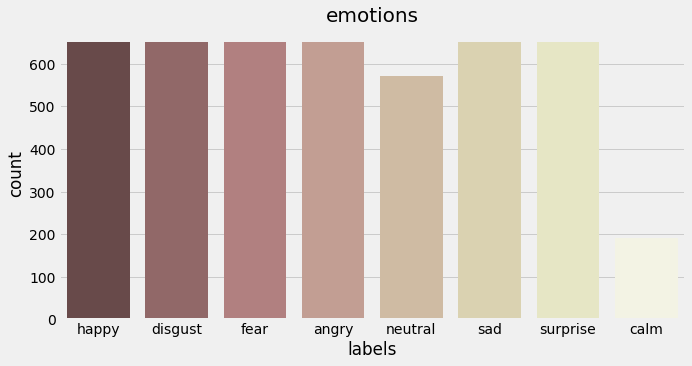

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(Features['labels'], palette = 'pink')
plt.title('emotions', fontsize = 20)
plt.show()

**Note :** Samples for Emotion Label Calm was very less. So we dropped all rows with label Calm.

In [ ]:
Features.drop(Features.loc[Features['labels'] =='calm'].index, inplace = True)

In [ ]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4674
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   min_intensity                     4483 non-null   float64
 1   relative_min_intensity_time       4483 non-null   float64
 2   max_intensity                     4483 non-null   float64
 3   relative_max_intensity_time       4483 non-null   float64
 4   mean_intensity                    4483 non-null   float64
 5   stddev_intensity                  4483 non-null   float64
 6   q1_intensity                      4483 non-null   float64
 7   median_intensity                  4483 non-null   float64
 8   q3_intensity                      4483 non-null   float64
 9   voiced_fraction                   4483 non-null   float64
 10  min_pitch                         4483 non-null   float64
 11  relative_min_pitch_time           4483 non-null   float64
 12  max_pi

#Feature Selection

In [ ]:
#Splitting Train and Test set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Features.iloc[:,0:80],
    Features['labels'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train.corr()

,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,mean_intensity,stddev_intensity,q1_intensity,median_intensity,q3_intensity,voiced_fraction,...,lpc 6,lpc 7,lpc 8,lpc 9,lpc 10,lpc 11,lpc 12,lpc 13,lpc 14,lpc 15
min_intensity,1.000000,0.456410,0.288394,-0.089427,0.840766,-0.904092,0.643262,-0.110675,0.450052,0.569734,...,0.125989,-0.118020,0.102223,-0.101767,0.103022,-0.103682,0.094317,-0.082375,0.102326,-0.097566
relative_min_intensity_time,0.456410,1.000000,0.281559,-0.058992,0.493567,-0.429786,0.412023,0.000250,0.387777,0.317958,...,0.154936,-0.131739,0.111785,-0.109520,0.107280,-0.102241,0.096412,-0.102622,0.104446,-0.049846
max_intensity,0.288394,0.281559,1.000000,0.047021,0.519719,-0.191629,0.396523,0.376613,0.909822,0.152822,...,0.432538,-0.399730,0.365340,-0.348356,0.330434,-0.299949,0.278162,-0.262085,0.215725,-0.123478
relative_max_intensity_time,-0.089427,-0.058992,0.047021,1.000000,-0.080323,0.099737,-0.065876,0.123527,0.003325,-0.082255,...,-0.037426,0.022739,-0.015200,0.013094,-0.006101,-0.003843,0.003513,0.007397,0.002064,-0.034467
mean_intensity,0.840766,0.493567,0.519719,-0.080323,1.000000,-0.892887,0.844918,0.086865,0.710450,0.719449,...,0.156797,-0.144137,0.125284,-0.130713,0.134329,-0.136551,0.133247,-0.121852,0.144838,-0.148968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lpc 11,-0.103682,-0.102241,-0.299949,-0.003843,-0.136551,0.059513,-0.070621,0.054755,-0.255881,0.035954,...,-0.801506,0.861277,-0.910238,0.951647,-0.984044,1.000000,-0.979177,0.918694,-0.790519,0.486681
lpc 12,0.094317,0.096412,0.278162,0.003513,0.133247,-0.056546,0.078757,-0.017484,0.241523,-0.019189,...,0.711406,-0.776439,0.837277,-0.894655,0.939743,-0.979177,1.000000,-0.965804,0.850765,-0.569026
lpc 13,-0.082375,-0.102622,-0.262085,0.007397,-0.121852,0.045967,-0.076139,-0.008864,-0.227938,0.017523,...,-0.600007,0.663362,-0.729070,0.800033,-0.865627,0.918694,-0.965804,1.000000,-0.926694,0.616965
lpc 14,0.102326,0.104446,0.215725,0.002064,0.144838,-0.077726,0.120665,0.048784,0.203944,0.067284,...,0.399709,-0.464977,0.533533,-0.617209,0.707990,-0.790519,0.850765,-0.926694,1.000000,-0.786798


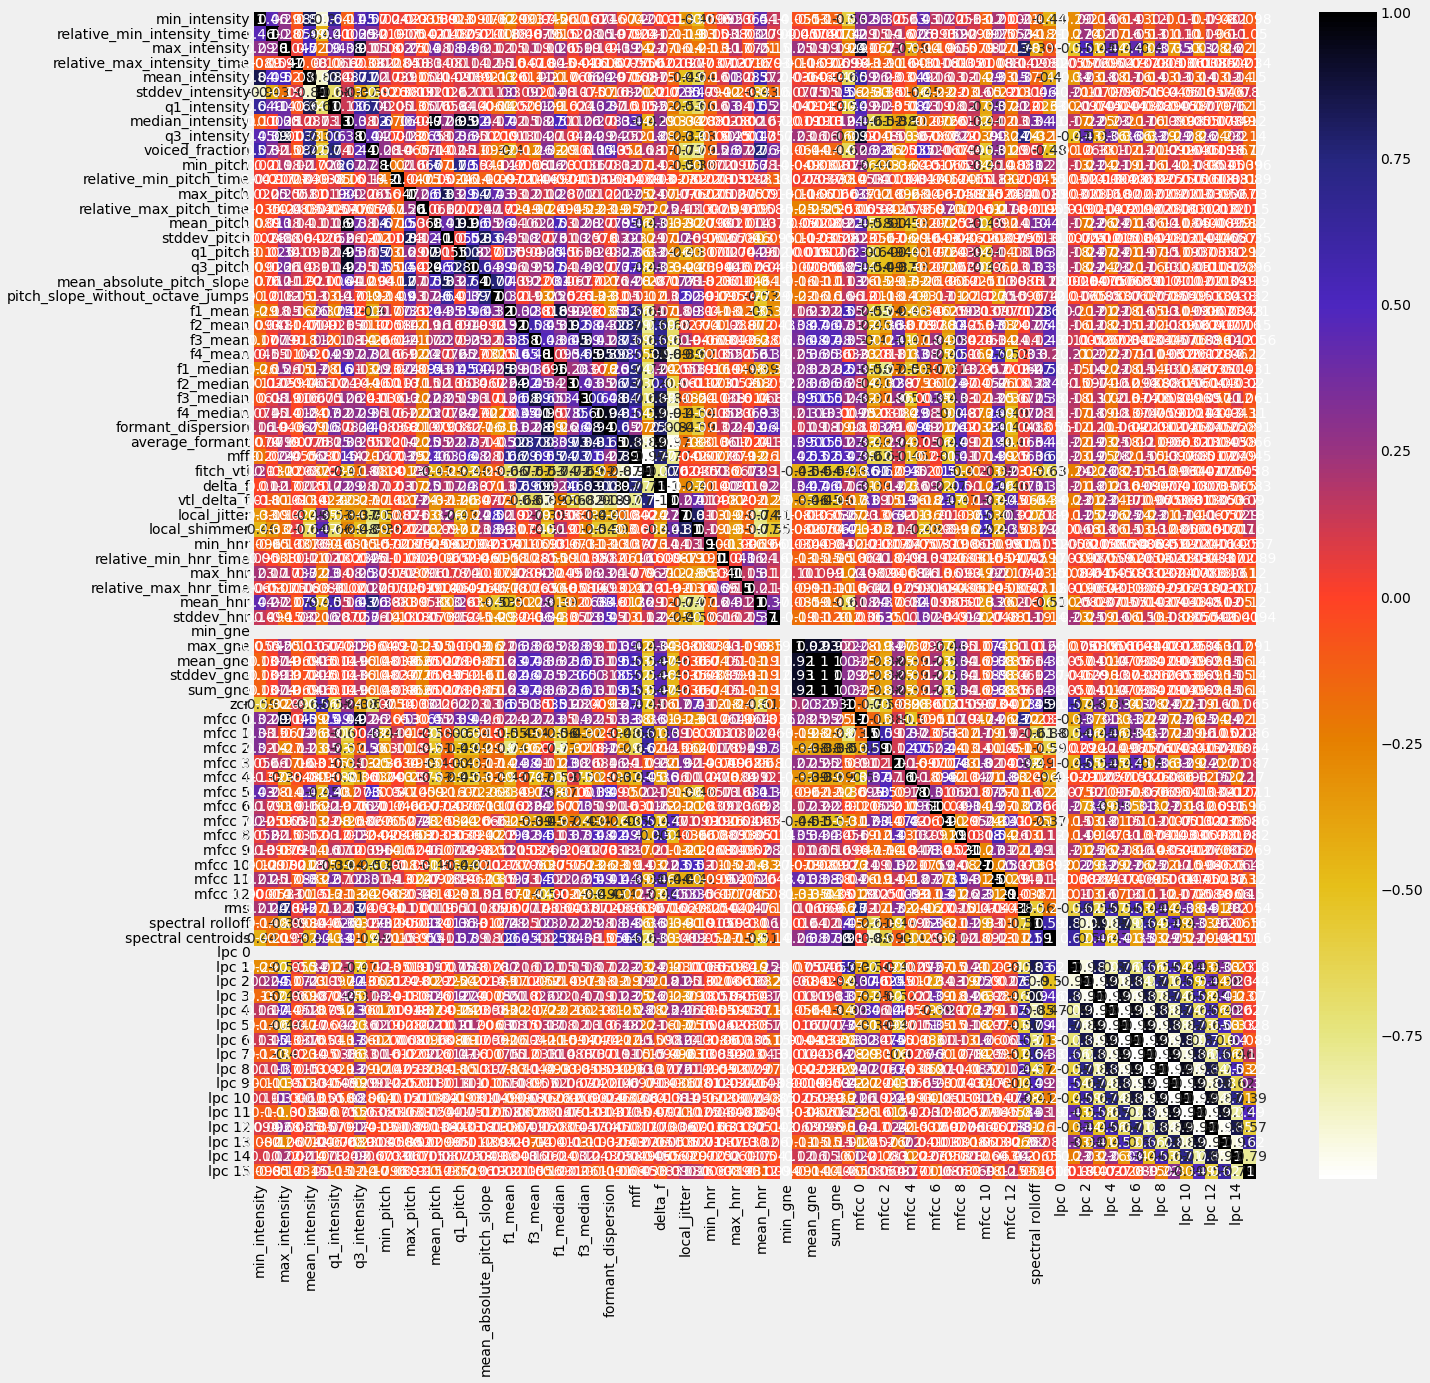

In [ ]:

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

47

There are 47 features correlated to each other. So we drop those features.

In [ ]:
corr_features

{'average_formant',
 'delta_f',
 'f1_median',
 'f2_median',
 'f3_median',
 'f4_median',
 'fitch_vtl',
 'formant_dispersion',
 'local_jitter',
 'local_shimmer',
 'lpc 1',
 'lpc 10',
 'lpc 11',
 'lpc 12',
 'lpc 13',
 'lpc 14',
 'lpc 15',
 'lpc 2',
 'lpc 3',
 'lpc 4',
 'lpc 5',
 'lpc 6',
 'lpc 7',
 'lpc 8',
 'lpc 9',
 'mean_absolute_pitch_slope',
 'mean_gne',
 'mean_hnr',
 'mean_intensity',
 'mean_pitch',
 'mfcc 0',
 'mfcc 1',
 'mfcc 2',
 'mff',
 'pitch_slope_without_octave_jumps',
 'q1_intensity',
 'q1_pitch',
 'q3_intensity',
 'q3_pitch',
 'rms',
 'spectral centroids',
 'stddev_gne',
 'stddev_intensity',
 'stddev_pitch',
 'sum_gne',
 'voiced_fraction',
 'vtl_delta_f'}

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,median_intensity,min_pitch,relative_min_pitch_time,max_pitch,relative_max_pitch_time,f1_mean,...,mfcc 5,mfcc 6,mfcc 7,mfcc 8,mfcc 9,mfcc 10,mfcc 11,mfcc 12,spectral rolloff,lpc 0
220,28.752968,0.539711,84.988147,0.200862,166.151196,127.856058,0.677402,483.325866,0.664242,404.303354,...,2.404673,-33.363491,-8.193911,-4.083898,-16.430824,-1.384894,-1.939743,-6.439634,4820.446777,1.0
1060,-7.382755,0.149957,64.494882,0.459140,131.062407,74.948960,0.750911,263.339912,0.263028,652.731268,...,0.320976,-13.340900,-10.955279,-5.633674,-13.607546,1.011395,-8.143515,0.075231,9730.914307,1.0
1215,-331.628252,0.060059,48.262845,0.650021,225.882206,107.049494,0.684886,298.800871,0.234551,515.075479,...,-10.363519,-20.466005,-15.530036,-9.116920,-2.066706,-8.764501,-4.786219,-12.977755,9750.852458,1.0
2498,30.618205,0.616900,70.187168,0.137032,182.319437,75.027579,0.872252,335.736546,0.208975,448.557414,...,13.594423,-3.396079,-31.618853,-1.392611,-8.463808,-8.868202,3.073129,-13.859743,8858.459936,1.0
218,26.741875,0.497078,88.288971,0.234769,194.824567,136.002234,0.187836,510.870885,0.732931,518.835539,...,-4.982182,-33.470394,-2.928490,-0.910237,-19.741072,2.136437,-2.070350,-7.645135,5359.873454,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,24.872551,0.886797,89.192039,0.437043,204.480452,104.036295,0.841125,285.585786,0.220649,424.974672,...,-1.874357,-27.487076,-10.432769,-12.733953,-6.916563,-4.340078,-8.338253,-8.029167,6163.480632,1.0
132,26.544349,0.907180,87.750023,0.213886,174.382538,124.917550,0.541488,232.910658,0.808194,491.820008,...,-6.808023,-34.235760,-6.415763,-3.470004,-19.674686,0.703271,-1.281710,-4.360370,5111.643473,1.0
4002,28.244000,0.939157,68.159932,0.194807,282.175665,239.873856,0.626023,391.057427,0.885534,422.133026,...,-3.319732,-16.132980,-0.391139,-12.337374,-0.019830,-21.285698,-8.261914,-3.896332,9489.131768,1.0
2021,26.880780,0.874295,74.593689,0.743939,228.528931,183.634450,0.556895,615.451386,0.272094,660.405817,...,7.765284,-17.643745,-5.801632,-8.138552,-2.218323,-13.498430,-0.121485,-4.572622,9455.165214,1.0


#Model Building
We trained a Catboost model

###Splitting Features into Train and Test sets

In [ ]:
#Splitting Train and Test set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Features.iloc[:,:-1],
    Features['labels'],
    test_size=0.2,
    random_state=0)

In [ ]:
# 7 Emotions
emotions = sorted(set(Features.labels))
emotions

['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

###Training

In [ ]:
clf = CatBoostClassifier(verbose=0, n_estimators=100)
clf.fit(X_train,y_train)

###Saving Model

In [ ]:
import pickle
filename = 'SER_Spec_35.sav'
pickle.dump(clf, open(filename, 'wb'))

###Loading Model

In [ ]:
import pickle
loaded_model = pickle.load(open('/content/SER_Spec_35.sav', 'rb'))

###Testing Models using Test set

In [ ]:
ypred=clf.predict(X_test)

result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2*100,'%')
result = confusion_matrix(y_test, ypred)
print('\nConfusion Matrix:')
print(result)

Accuracy: 84.01486988847584 %

Confusion Matrix:
[[184   5  11   6   1   4   3]
 [  5 159   5   3   7  10   6]
 [  3   5 161   6   0   7   8]
 [  6   4  11 158   3   3  16]
 [  3   6   2   1 156   8   0]
 [  6   6   3   2  14 162   1]
 [  4   2   3  13   0   3 150]]


#Discussion: <br>



*   We used Catboost classifier to detect emotions 
*   We trained the model for both selected features and all extracted features and found that model gives better results when used selected features.
*   Accuracy achieved is 84.015%





#Test on One Audio file

In [ ]:
from IPython.display import Audio
path='angry.wav'
Audio(path)

### **Instructions:** <br>
Upload the saved model - **' SER_Spec_35 '**<br>
Upload the py file **'feature_extraction_utils.py'** <br>
Run the functions **'extract_pros_features'** , **'extract_spec_features'** and **'get_features'**

In [ ]:
#Convertung features into dataframe
Feature_test, Emo_test = [], []
feature = get_features(path)
Feature_test.append(feature)

In [ ]:
Features = pd.DataFrame(Feature_test)
Features

,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,mean_intensity,stddev_intensity,q1_intensity,median_intensity,q3_intensity,voiced_fraction,...,lpc 7,lpc 8,lpc 9,lpc 10,lpc 11,lpc 12,lpc 13,lpc 14,lpc 15,lpc 16
0,21.620151,0.741334,79.090321,0.238772,65.012155,13.215636,62.300112,239.066675,74.117911,0.745192,...,-1.147856,0.92827,-1.110576,1.013745,-0.791119,0.516878,-0.475831,0.442849,-0.18469,0.036849


In [ ]:
import pickle
loaded_model = pickle.load(open('/content/SER_Spec_35.sav', 'rb'))

In [ ]:
ypred=clf.predict(Features)
print(ypred)

[['angry']]
